# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
BCSC_data <- read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
BCSC_data_expanded <- BCSC_data[rep(row.names(BCSC_data), BCSC_data$count), 1:length(BCSC_data)-1]
#numero de filas
nrow(BCSC_data_expanded)

[1] 6318638

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
idx_sample <- sample(1:nrow(BCSC_data_expanded), 5000, replace = F)
BCSC_sample <- BCSC_data_expanded[idx_sample,]

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [3]:
colRace <- which(colnames(BCSC_sample) == 'race_eth')
colBCH <- which(colnames(BCSC_sample) == 'breast_cancer_history')
BCSC_sample[, colRace:colBCH][BCSC_sample[, colRace:colBCH] == 9] <- NA

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [4]:
BCSC_sample$first_degree_hx <- factor(BCSC_sample$first_degree_hx, labels = c('No', 'Yes'))

In [5]:
ageVectors <- c(24,32,37,42,47,52,57,62,67,72,77,82,87)
BCSC_sample$age<-ageVectors[BCSC_sample$'age_group_5_years']

In [6]:
library(ggplot2)

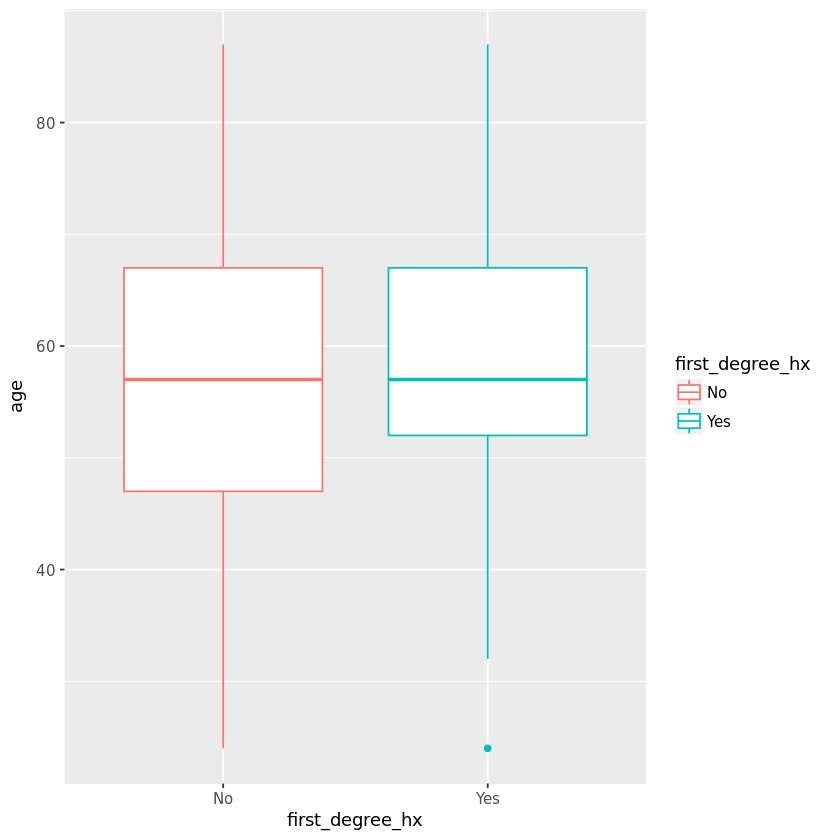

In [7]:
ggplot(data=subset(BCSC_sample, !is.na(first_degree_hx)), aes(x=first_degree_hx)) + 
geom_boxplot(aes(y=age, color=first_degree_hx))

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [8]:
paste("Las muestras de los pacientes que tienen antecedentes familiares, parece no seguir una gaussiana.pvalor: ",
     shapiro.test(BCSC_sample$age[BCSC_sample$first_degree_hx == 'Yes'])$p.value)
paste("Las muestras de los pacientes que tienen antecedentes familiares, parece no seguir una gaussiana.pvalor: ",
     shapiro.test(BCSC_sample$age[BCSC_sample$first_degree_hx == 'No'])$p.value)

[1] "Las muestras de los pacientes que tienen antecedentes familiares, parece no seguir una gaussiana.pvalor:  4.48087454231314e-11"

[1] "Las muestras de los pacientes que tienen antecedentes familiares, parece no seguir una gaussiana.pvalor:  4.54082851719025e-31"

In [9]:
wilcox.test(age ~ first_degree_hx, data=BCSC_sample)
paste("Por el valor tan bajo del p-value, rechazamos la hipotesis nula, y determinamos que ambas distribuciones son distintas (independientes entre si)")


	Wilcoxon rank sum test with continuity correction

data:  age by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


[1] "Por el valor tan bajo del p-value, rechazamos la hipotesis nula, y determinamos que ambas distribuciones son distintas (independientes entre si)"

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

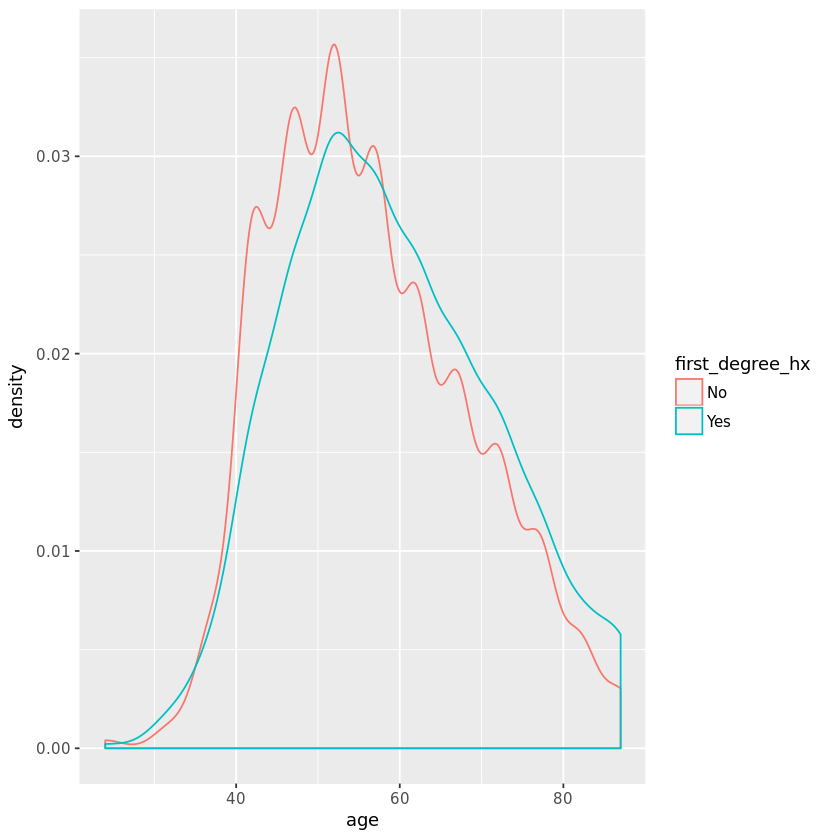

In [10]:
ggplot(data=subset(BCSC_sample, !is.na(first_degree_hx)), aes(x=age, group=first_degree_hx, color=first_degree_hx)) + geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

In [11]:
BCSC_sample$BIRADS_breast_density <- factor(BCSC_sample$BIRADS_breast_density, 
labels = c('Almost entirely fat', 'Scattered fibroglandular densities', 'Heterogeneously dense', 'Extremely dense'))

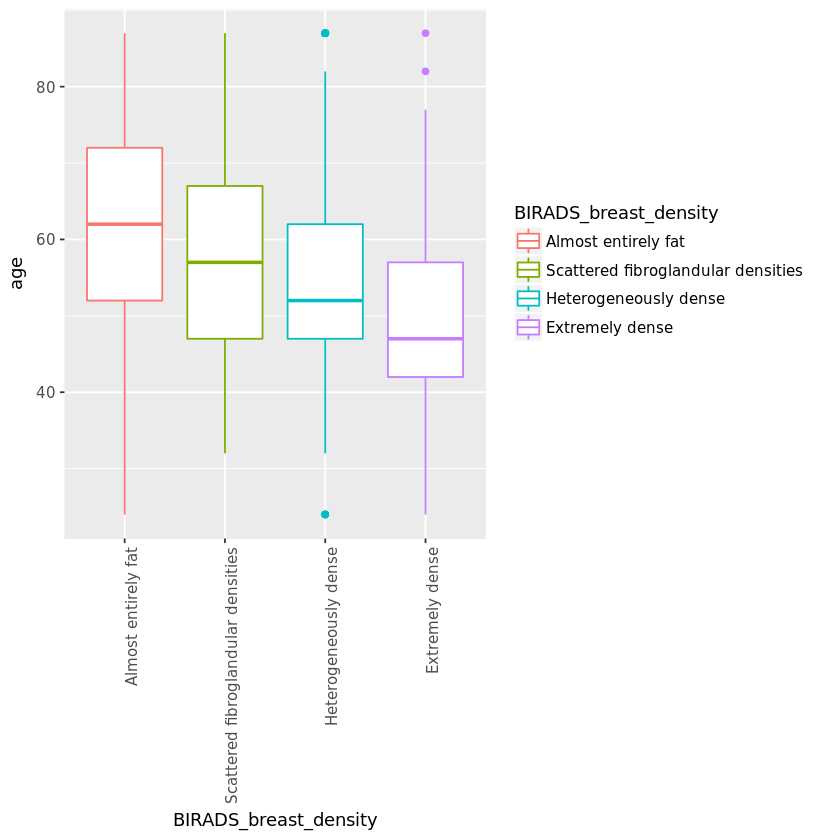

In [12]:
ggplot(data=subset(BCSC_sample, !is.na(BIRADS_breast_density)), aes(x=BIRADS_breast_density)) +
geom_boxplot(aes(y=age, color=BIRADS_breast_density)) +
theme(axis.text.x=element_text(angle=90,hjust=1))

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [13]:
# Comprobamos si podemos realizar test ANOVA
for(v in levels(BCSC_sample$BIRADS_breast_density)) {
    print(paste("Densidad: ", v, ", p-value: ", 
    shapiro.test(BCSC_sample$age[BCSC_sample$BIRADS_breast_density == v])$p.value))
}
bartlett.test(age~BIRADS_breast_density, data=BCSC_sample)
print("Los grupos no presentan la misma varianza, con lo que usaremos el test de Welch")

[1] "Densidad:  Almost entirely fat , p-value:  0.000151865852273701"
[1] "Densidad:  Scattered fibroglandular densities , p-value:  4.7377089605984e-20"
[1] "Densidad:  Heterogeneously dense , p-value:  1.2162989002878e-20"
[1] "Densidad:  Extremely dense , p-value:  2.89718130439785e-09"



	Bartlett test of homogeneity of variances

data:  age by BIRADS_breast_density
Bartlett's K-squared = 18.959, df = 3, p-value = 0.0002789


[1] "Los grupos no presentan la misma varianza, con lo que usaremos el test de Welch"


In [14]:
oneway.test(age~BIRADS_breast_density, data=BCSC_sample)
paste('Con lo que rechazamos la Hipotesis Nula, y asumimos que si que la edad en la que se detecta, depende del tipo de cancer')


	One-way analysis of means (not assuming equal variances)

data:  age and BIRADS_breast_density
F = 60.558, num df = 3.00, denom df = 771.29, p-value < 2.2e-16


[1] "Con lo que rechazamos la Hipotesis Nula, y asumimos que si que la edad en la que se detecta, depende del tipo de cancer"

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [15]:
table_BIRADS <- table(BCSC_sample$BIRADS_breast_density)
chisq.test(table_BIRADS)
paste('El valor tan bajo de p-value, nos indica que no son equiprobables')


	Chi-squared test for given probabilities

data:  table_BIRADS
X-squared = 1816.3, df = 3, p-value < 2.2e-16


[1] "El valor tan bajo de p-value, nos indica que no son equiprobables"

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [16]:
table_BIRADS <- table(BCSC_sample$BIRADS_breast_density)
prop_table_BIRADS <- prop.table(table_BIRADS)
prop_table_BIRADS
which.max(prop_table_BIRADS)
print(paste("(",round(prop_table_BIRADS[which.max(prop_table_BIRADS)], 4) * 100, '%)'))


               Almost entirely fat Scattered fibroglandular densities 
                        0.08094849                         0.45380213 
             Heterogeneously dense                    Extremely dense 
                        0.39547561                         0.06977378 

Scattered fibroglandular densities 
                                 2

[1] "( 45.38 %)"


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [17]:
table_BIRADS_FAM <- table(BCSC_sample$BIRADS_breast_density, BCSC_sample$first_degree_hx)
table_BIRADS_FAM
chisq.test(table_BIRADS_FAM)
paste("Aceptamos Hipotesis Nula. No hay asociacion estadistica entre el tipo de cancer, y si tiene o no antecedentes familiares")

                                    
                                       No  Yes
  Almost entirely fat                 223   56
  Scattered fibroglandular densities 1324  248
  Heterogeneously dense              1135  229
  Extremely dense                     190   45


	Pearson's Chi-squared test

data:  table_BIRADS_FAM
X-squared = 4.2475, df = 3, p-value = 0.236


[1] "Aceptamos Hipotesis Nula. No hay asociacion estadistica entre el tipo de cancer, y si tiene o no antecedentes familiares"

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [18]:
BCSC_sample$race_eth <- factor(BCSC_sample$race_eth, 
labels = c('Non-Hispanic white', 'Non-Hispanic black', 'Asian/Pacific Islander',
          'Native American', 'Hispanic', 'Other/mixed'))

In [19]:
table_BIRADS_RACE <- table(BCSC_sample$BIRADS_breast_density, BCSC_sample$race_eth)
chisq.test(table_BIRADS_RACE)
paste("En este caso, no podemos aceptar Hipotesis nula. Parece que existe una asociacion entre el tipo de cancer, y el grupo etnico al que se pertenece")

Warning message in chisq.test(table_BIRADS_RACE):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table_BIRADS_RACE
X-squared = 48.684, df = 15, p-value = 1.971e-05


[1] "En este caso, no podemos aceptar Hipotesis nula. Parece que existe una asociacion entre el tipo de cancer, y el grupo etnico al que se pertenece"

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [20]:
prop.test(table_BIRADS_RACE['Almost entirely fat', 'Native American'],table_BIRADS['Almost entirely fat'],conf.level = 0.95)
paste('Vemos que con un margen de error del 95%, el resultado es de 0.3367 %')


	1-sample proportions test with continuity correction

data:  table_BIRADS_RACE["Almost entirely fat", "Native American"] out of table_BIRADS["Almost entirely fat"], null probability 0.5
X-squared = 291.03, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.0001757831 0.0215738348
sample estimates:
          p 
0.003367003 


[1] "Vemos que con un margen de error del 95%, el resultado es de 0.3367 %"